# <b>03-Spatial Correlation and Convolution</b>

## <b>1. Correlation</b><br/>
<p>
Is a process of moving a filter mask over the image and computing the sum of product.
</p>
<h3>
$$ w(x, y) \star f(x, y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s, t)   f(x+s, y+t)$$
</h3>

## <b>2. Convolution</b><br/>
<p>
Same as correlation but the filter first rotate by $180^o$
</p>
<h3>
$$ w(x, y) \ast f(x, y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s, t)   f(x-s, y-t)$$
</h3>

### Figure, Convolution

<img src="../../resource/image/convolution.png" />

## <b>Exercise write both functions correlation and convolution</b>

(512, 512)


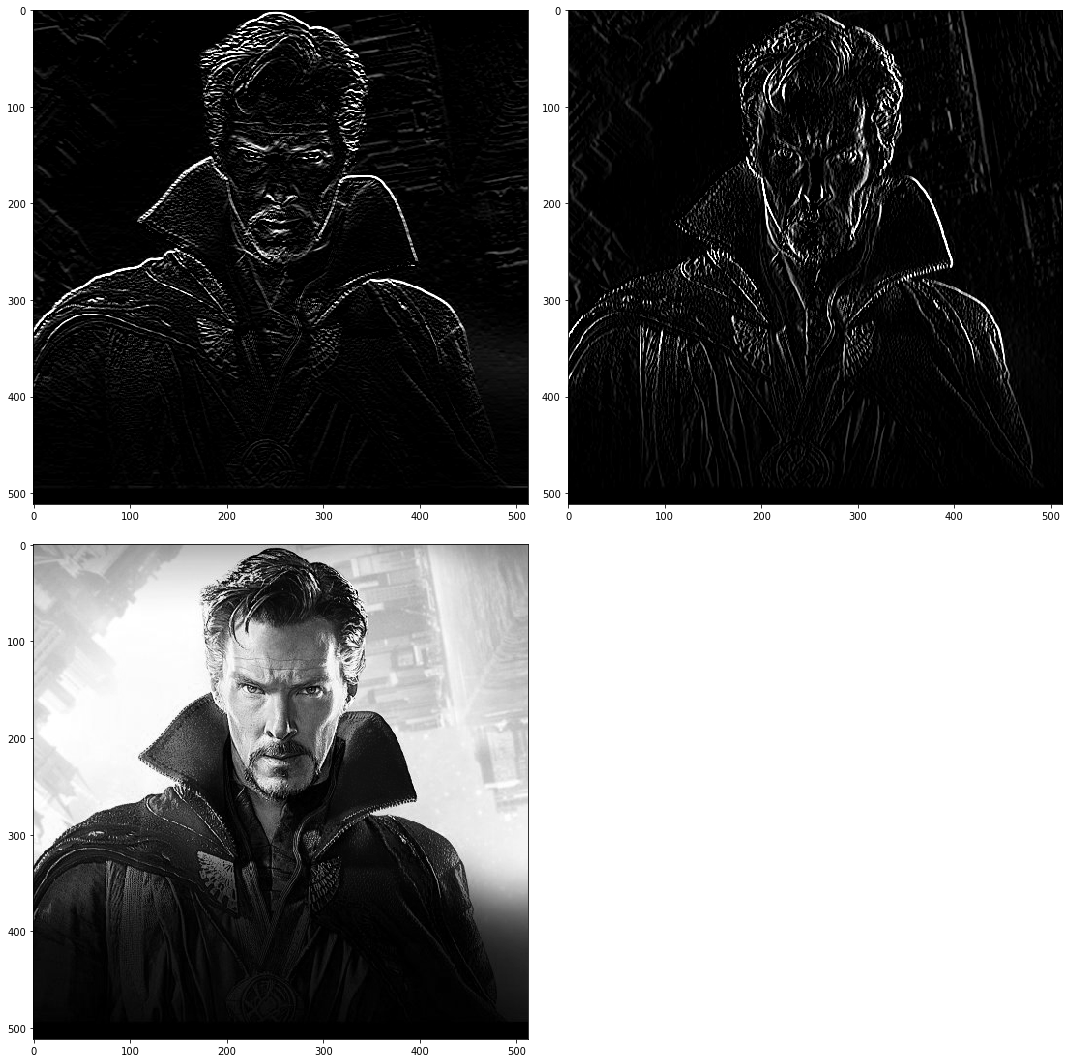

In [61]:
# Let's go!!
%matplotlib inline
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

def corr(img, kernel):
    dim_img = img.shape
    dim_kernel = kernel.shape
    result = np.zeros(dim_img)
    for col in np.arange(dim_img[0]):
        r = 0
        for row in np.arange(dim_img[1]):
            pos = {'x': col, 'y': row}
            sub_img_pos = [
                (pos['x']-1, pos['y']-1), (pos['x'], pos['y']-1), (pos['x']+1, pos['y']-1),
                (pos['x']-1, pos['y']), (pos['x'], pos['y']), (pos['x']+1, pos['y']),
                (pos['x']-1, pos['y']+1), (pos['x'], pos['y']+1), (pos['x']+1, pos['y']+1),     
            ]
            sub_img = []
            for pos in sub_img_pos:
                if pos[0] < dim_img[0] and pos[0] >= 0 and pos[1] < dim_img[1] and pos[1] >= 0:
                        sub_img.append(img[pos])
                else:
                    sub_img.append(0)
            sub_img = np.asarray(sub_img).reshape(3, 3)
            r = np.sum([ x for x in sub_img*kernel])
            if r > 1:
                result[col, row] = 1
            elif r < 0:
                result[col, row] = 0
            else:
                result[col, row] = r
    return result

img = io.imread('../../resource/image/dr_strange.jpg')
img = color.rgb2gray(img)
k = [[1, 0, -1]*3]
k_filp = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
kernel = np.asarray(k).reshape(3, 3)
kernel_filp = np.asarray(k_filp).reshape(3, 3)
corr_img = corr(img, kernel)
cov_img = corr(img, kernel_filp)
print(corr_img.shape)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(221)
io.imshow(corr_img)

fig.add_subplot(222)
io.imshow(cov_img)

fig.add_subplot(223)
io.imshow(img)
plt.show()

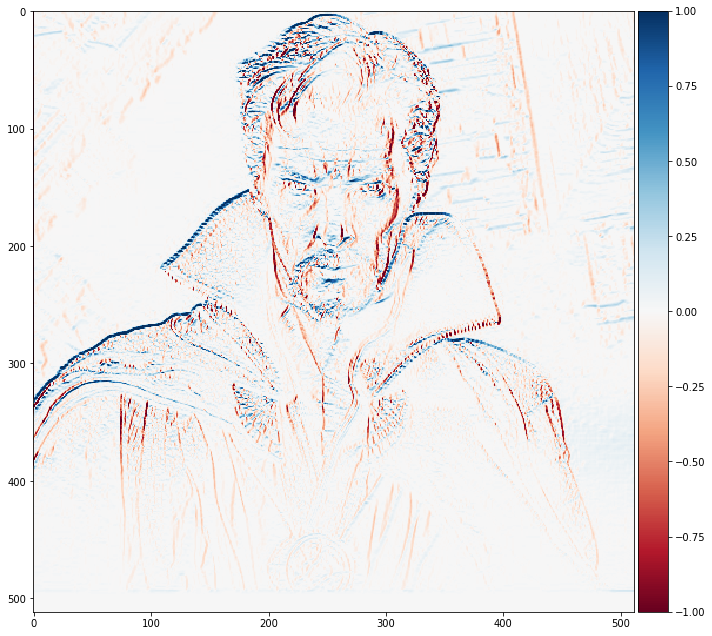

In [62]:
diff = corr_img - cov_img

fig1 = plt.figure(figsize=(10,10))
io.imshow(diff)
plt.show()